# [3] 머신러닝 알고리즘 
- Linear Regression 
- Decision Tree
- Random Forests
- CatBoost
- Logistic Regression (for Categorical Target)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# YONG's local data path
# dataPath = 'C:/YONG/m1710/myPydata/'

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)


### 선형회귀분석

In [64]:
# For Linear Regression, Load Sample Data

from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

print(df.shape)
df.head()


(24, 5)


,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [65]:
# 다음달의 지수를 예측하는 구조로 변경
# Perdictor(Independent) Variable: ~t-1
# Target(Dependent) Variable: t

nm_SIP = np.array(df.Stock_Index_Price[1:]) # SIP of the next month
dfp = df.head(23)
dfp['nm_SIP'] = nm_SIP
dfp.tail()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price,nm_SIP
18,2016,6,1.75,6.1,884,866
19,2016,5,1.75,6.1,866,876
20,2016,4,1.75,5.9,876,822
21,2016,3,1.75,6.2,822,704
22,2016,2,1.75,6.2,704,719


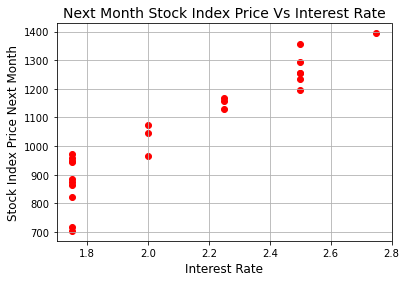

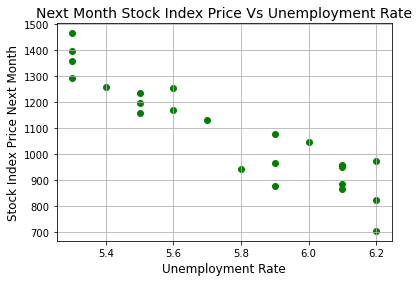

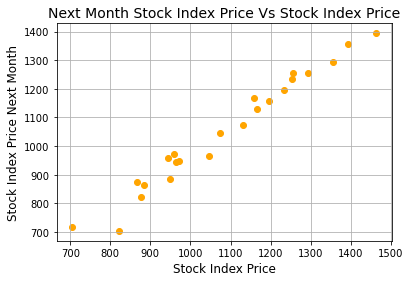

In [66]:
# 시각적인 linearity check - 사전적인 분포확인 : 탐색적 데이터 분석

plt.scatter(dfp['Interest_Rate'], dfp['nm_SIP'], color='red')
plt.title('Next Month Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Stock Index Price Next Month', fontsize=12)
plt.grid(True)
plt.show()
 
plt.scatter(dfp['Unemployment_Rate'], dfp['Stock_Index_Price'], color='green')
plt.title('Next Month Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('Stock Index Price Next Month', fontsize=12)
plt.grid(True)
plt.show()

plt.scatter(dfp['Stock_Index_Price'], dfp['nm_SIP'], color='orange')
plt.title('Next Month Stock Index Price Vs Stock Index Price', fontsize=14)
plt.xlabel('Stock Index Price', fontsize=12)
plt.ylabel('Stock Index Price Next Month', fontsize=12)
plt.grid(True)
plt.show()

### 단순선형회귀분석 (Simple Linear Regression)

Intercept:   -48.116700201207095
Coefficients:   527.5975855130785


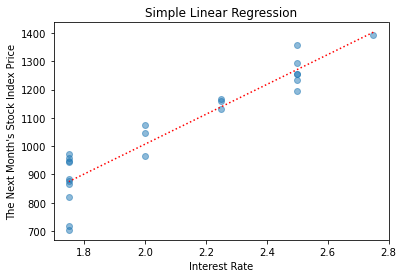

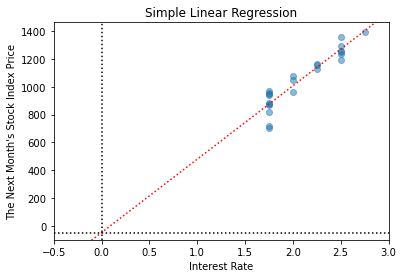

In [69]:
# Simple Linear Regression
# 하나의 독립변수 predictor로 종속변수 target을 설명

from pandas import DataFrame
from sklearn import linear_model

X = dfp[['Interest_Rate']]
# 독립변수의 리스트로 정의. 
# 하지만, 내용물은 하나 뿐이기에 단순선형회귀분석
Y = dfp['nm_SIP']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_[0]) 
# 리스트이기 때문에 0번 요소를 출력해야 숫자

# make predictions - back test or back fitting
# (훈련에 사용된 과거 데이터에 적용)
predictions = regr.predict(X)


# 시각적으로 선형회귀분석 결과 확인
plt.scatter(X,Y,  alpha=0.5)
plt.plot(X,predictions, color='red', linestyle=':')
plt.xlabel('Interest Rate')
plt.ylabel("The Next Month's Stock Index Price")
plt.title('Simple Linear Regression')
plt.show()

# 절편 확인
X1 = (np.array(range(-5,30))/10).reshape(-1, 1)
predictions = regr.predict(X1)
plt.scatter(X,Y,  alpha=0.5)
plt.plot(X1,predictions, color='red', linestyle=':')
plt.xlabel('Interest Rate')
plt.ylabel("The Next Month's Stock Index Price")
plt.title('Simple Linear Regression')
plt.xlim(-0.5,3)
plt.ylim(-100,Y.max()*1.05)
plt.axvline(0, color='black', linestyle='dotted')
plt.axhline(regr.intercept_, color='black', linestyle='dotted')
plt.show()

#### [Quiz] Unemployment Rate로 독립변수를 변경하여 선형회귀분석을 실시하라

In [149]:
# Simple Linear Regression
# 하나의 독립변수 predictor로 종속변수 target을 설명

from pandas import DataFrame
from sklearn import linear_model

X = dfp[['Unemployment_Rate']]
# 독립변수의 리스트로 정의. 
# 하지만, 내용물은 하나 뿐이기에 단순선형회귀분석
Y = dfp['nm_SIP']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_[0]) 
# 리스트이기 때문에 0번 요소를 출력해야 숫자

# make predictions - back test or back fitting
# (훈련에 사용된 과거 데이터에 적용)
predictions = regr.predict(X)


Intercept:   4272.694807552649
Coefficients:   -558.8979665940449


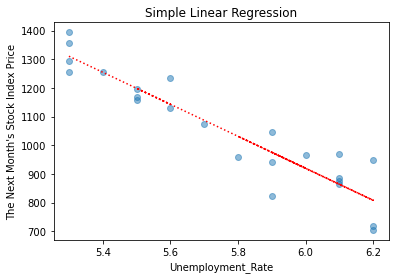

In [150]:
# 시각적으로 선형회귀분석 결과 확인
plt.scatter(X,Y,  alpha=0.5)
plt.plot(X,predictions, color='red', linestyle=':')
plt.xlabel('Unemployment_Rate')
plt.ylabel("The Next Month's Stock Index Price")
plt.title('Simple Linear Regression')
plt.show()



### 다중선형회귀분석 Multiple Linear Regression

In [80]:
from pandas import DataFrame
from sklearn import linear_model

X = dfp[['Interest_Rate','Unemployment_Rate']] 
# here we have 2 variables for multiple regression. 
# If you just want to use one variable for simple linear regression, 
# then use X = df[['Interest_Rate']] for example.Alternatively, you may add additional variables within the brackets
Y = dfp['nm_SIP']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_)


# prediction with new values
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('\nPredicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))


Intercept:   2086.4847782457537
Coefficients:   [ 282.73906776 -281.83113322]

Predicted Stock Index Price: 
 [1370.3122085]


In [81]:
# 회귀분석 결과 세부사항 보기
import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()

# 회귀분석 결과의 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 nm_SIP   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     98.31
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           4.50e-11
Time:                        10:42:18   Log-Likelihood:                -126.32
No. Observations:                  23   AIC:                             258.6
Df Residuals:                      20   BIC:                             262.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2086.4848    803.82

- 다중회귀분석이므로 R-squared 대신 Adj. R-squared 확인
- Adj. R-squared 높음
- Prob (F-statistic) 매우 작은 값 = 유의
- 변수들의 P>|t| 0.05 보다 작음. 유의

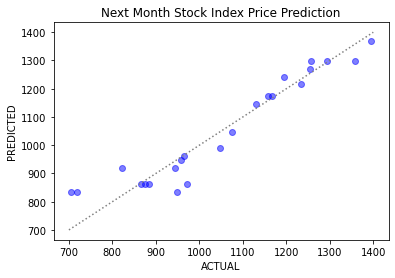

Correlation between predicted and actual:  0.9527172624476381
R-squared(= Square of correlation): 0.9076701821657217


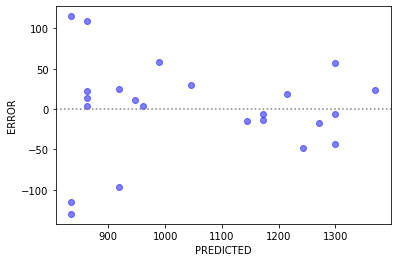

In [82]:
# investigate predictions

predictions = model.predict(X) 

plt.scatter(Y, predictions, color='blue', alpha=0.5)
plt.plot([700,1400],[700,1400], 
         color='grey', linestyle=':')
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.title('Next Month Stock Index Price Prediction')
plt.show()

# Naively Check Accuracy
print('Correlation between predicted and actual: ',  np.corrcoef(Y, predictions)[0,1])
print('R-squared(= Square of correlation):' , np.corrcoef(Y, predictions)[0,1]**2)

# Prediction - Error
# c.f. conventionally put predicted into Y-axis
plt.scatter(predictions, Y-predictions, color='blue', alpha=0.5)
plt.axhline(0, color='grey', linestyle=':')
plt.xlabel('PREDICTED')
plt.ylabel('ERROR')
plt.show()

- [WARNING] 실전에서 이렇게 초보적 단순한 방식은 초기 단계의 단순 참고용 정도로만 사용.

다중회귀분석 추가 검토사항
- 회귀분석 가정 충족 여부
- 변수 선택 (Forward, Backward, Stepwise)

### Load Virtual Customer Transaction Summary dataset

#### about Customer Transaction Summary dataset
- 가상적인 신용카드사 또는 종합쇼핑몰 의 거래내역을 기초 집계해서 생성한 데이터
- 카테고리들을 자신의 업종에 대입한다면 (상품군 - 예: 보험이라면 장기, 단기, 종합 등) 

In [83]:
# contains only female customers
print(dataPath)
dfc20 = pd.read_csv(dataPath + 'dfc20bs.csv')
print(dfc20.columns)
list_feat = ['custid','age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']

dfc21 = dfc20[dfc20.sex=='F'][list_feat]
print(dfc21.shape)
dfc21.head()

https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/
Index(['Unnamed: 0', 'custid', 'age', 'sex', 'marital', 'area', 'education',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
       'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(5000, 13)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,cnt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,4,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,3,17,271796,8
2,3,27,0,0,20200,0,0,0,0,2,16,369348,3
3,4,27,0,0,0,0,0,0,0,2,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,4,22,204884,10


In [84]:
print('Column Descriptions\n=======================')
print(dfc21.columns)
print(['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액','프리미엄스니커즈구매액','구매건수','로그인건수','다음해구매금액','다음해구매건수'])

Column Descriptions
Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['고객번호', '연령', '나이키구매액', '스타벅스구매액', '디지털구매액', '서적구매액', '호텔구매액', '프리미엄스니커즈구매액', '구매건수', '로그인건수', '다음해구매금액', '다음해구매건수']


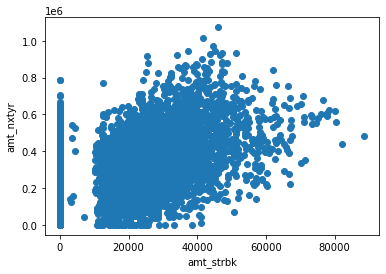

0.36493590010825916


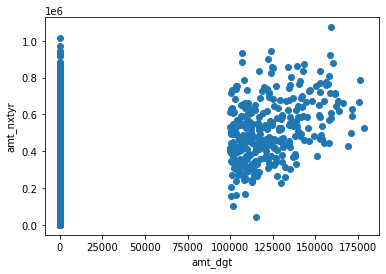

0.27638638276202504


In [85]:
# EDA

plt.scatter(dfc21.amt_strbk, dfc21.amt_nxtyr)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

print(np.corrcoef(dfc21.amt_strbk, dfc21.amt_nxtyr)[0,1])

plt.scatter(dfc21.amt_dgt, dfc21.amt_nxtyr)
plt.xlabel('amt_dgt')
plt.ylabel('amt_nxtyr')
plt.show()

print(np.corrcoef(dfc21.amt_dgt, dfc21.amt_nxtyr)[0,1])

### [실습]
- 전년의 구매건수와 다음해의 구매건수간의 관계를 시각적으로 확인하라

- 참고: 회귀분석에서는 수치형 변수만을 사용(regression에서 독립변수 종속변수 모두)

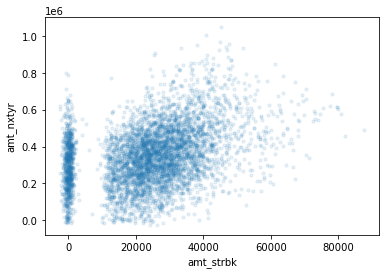

In [86]:
# EDA scatterplot

plt.scatter(rjitt(dfc21.amt_strbk), rjitt(dfc21.amt_nxtyr), 
            alpha=0.1, s=10)
plt.xlabel('amt_strbk')
plt.ylabel('amt_nxtyr')
plt.show()

# Linear Relationship?

[Remember!]
- 실전에서는 데이터의 양이 많아서 많은 수의 점을 표시해야한다
- 점들이 겹치는 경우가 흔하다
- 밀도를 파악하는 것도 중요하다

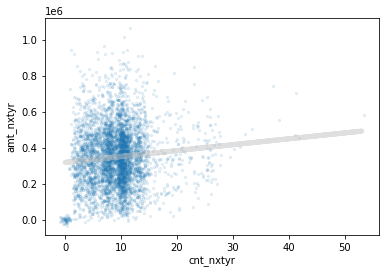

correlation =  0.08767


In [87]:
# EDA scatterplot

from sklearn import linear_model

regr = linear_model.LinearRegression()
# X, Y 두개 변수에 각각 값을 대입
X, Y = dfc21[['cnt_nxtyr']], dfc21.amt_nxtyr
regr.fit(X, Y)
predictions = regr.predict(X)

plt.scatter(rjitt(dfc21.cnt_nxtyr), rjitt(Y), 
            alpha=0.1, s=5)
plt.plot(X, predictions, color='silver', linewidth=5, alpha=0.5)
plt.xlabel('cnt_nxtyr')
plt.ylabel('amt_nxtyr')
plt.show()

print('correlation = ', round(np.corrcoef(dfc21.cnt_nxtyr, dfc21.amt_nxtyr)[0,1],5))
# Linear Relationship?

### [실습] 
- Customer Transaction Summary 의 다음해 구매금액을 예측하는 다중선형회귀분석을 실시
- 모델의 R Sqaured를 확인
- 각각을 비교했을 때 **타겟과 가장 상관관계가 높은 독립변수**를 파악
- 상관계수가 가장 큰 세 개의 독립변수만을 사용한 모델의 R Squared 확인

In [93]:
dfc21.shape
dfc21.columns

listofX = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']


from sklearn import linear_model

X = dfc21[listofX] 
Y = dfc21['amt_nxtyr']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_)



Intercept:   417415.1742382378
Coefficients:   [-5.06545315e+03  8.77889984e-01  6.82258899e-01  3.57284891e+00
  6.66236147e-01  8.77713047e-01 -9.98244684e-02  9.22603106e-02
 -7.33012194e+03 -9.17266628e+02]


[답확인] http://blog.daum.net/revisioncrm/478 

### Decision Tree
- sklearn의 DT에서는 수치형 독립변수만 사용하는 점에 주의

['amt_strbk']

DT Predicting  amt_nxtyr   : 


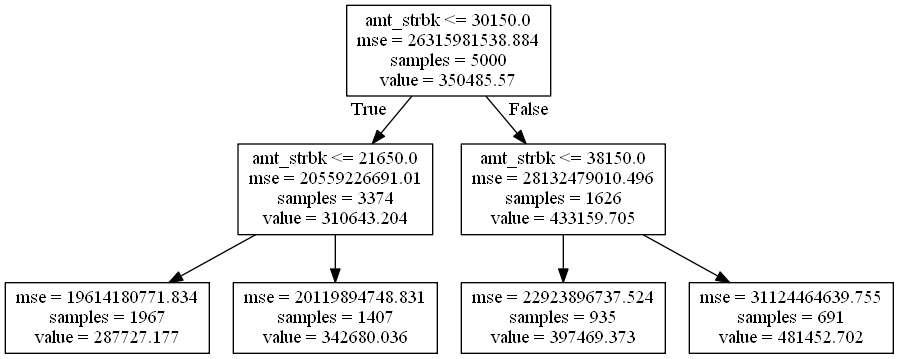

In [95]:
from sklearn.tree import DecisionTreeRegressor

# 사용할 독립변수와 종속변수 정의
dtfeatures = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
              'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']

dtfeatures = ['amt_strbk']

print(dtfeatures)
tgt = 'amt_nxtyr'

dfdt = dfc21.copy()

dt1 = DecisionTreeRegressor(min_samples_split=30, 
                            max_depth=2, 
                            min_samples_leaf=100, 
                            random_state=99)
dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# [주의] path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 
# graphviz 가 존재하는 path를 정확하게 지정해 주어야 DT 플롯 생성됨

import os     
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'


from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz

# 아래 두 패키지는 트리 시각화를 위해 추가 설치 필요
# pip install pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

print('\nDT Predicting ',tgt, '  : ')
# Show graph
Image(graph.create_png())

[트리 시각화를 위한 graphviz 세팅]
- google "graphviz-2.38.msi"
https://www.npackd.org/p/org.graphviz.Graphviz/2.38

- download and install to a default folder
'C:\Program Files (x86)\Graphviz2.38' 

- add to the sys path
'C:\Program Files (x86)\Graphviz2.38\bin\' 

[트리 옵션 참고]
- min_samples_split=30   # split이 이루어지기 위해 parent node가 가져야하는 최소 sample size
- max_depth=2  # root를 제외하고 얼마나 깊이 까지 트리를 분기 할 것인지
- min_samples_leaf=10 # leaf 노드에 들어있어야 하는 최소 sample size 
- random_state =99 # 재실행시 random seed 변동에 따른 결과 차이를 방지하기 위해 임의의 숫자로 고정

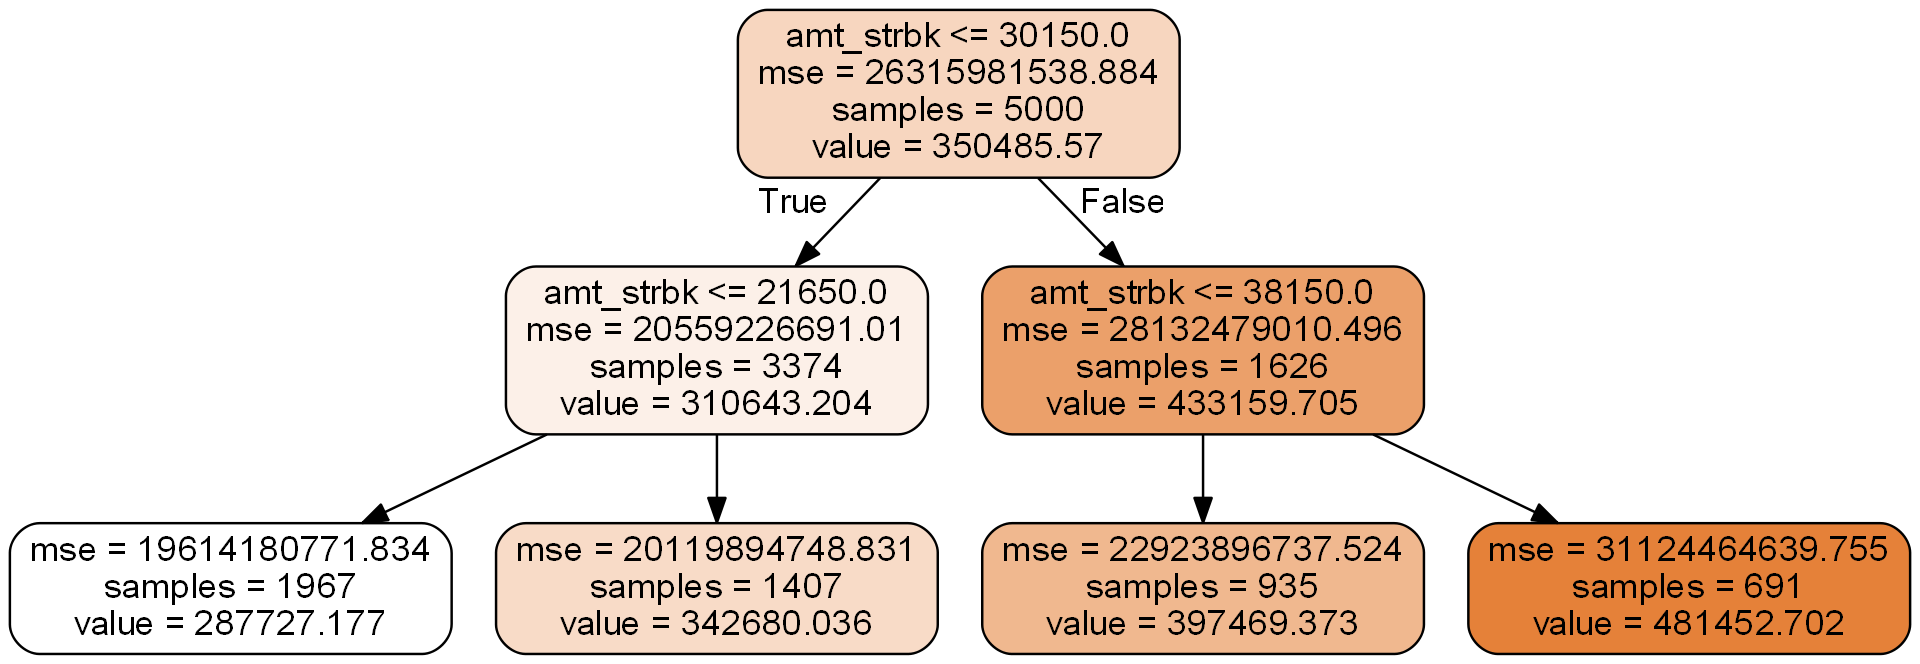

In [96]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Export resulting tree to DOT source code string
dot_data = export_graphviz(dt1,
                                feature_names=dtfeatures,
                                out_file=None,
                                filled=True,
                                rounded=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
# pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"20,20!"') # control resolution
# Show graph
Image(pydot_graph.create_png())
# pydot_graph.write_png('resized_tree.png')

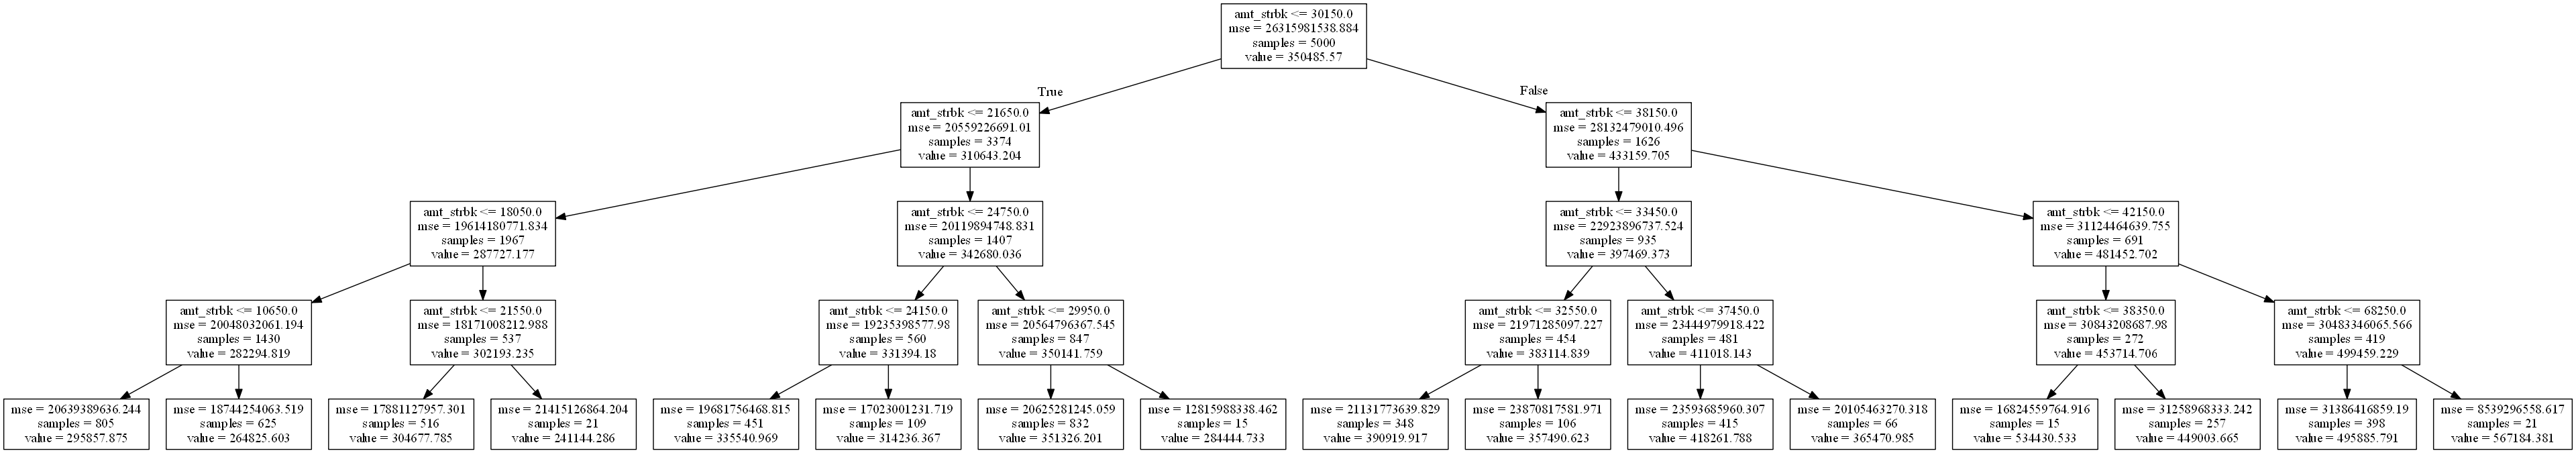

In [99]:
# bush tree

from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, 
                            max_depth=4, 
                            min_samples_leaf=10, 
                            random_state=99)

tgt = 'amt_nxtyr'

dfdt = dfc21

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 

from sklearn import tree
from IPython.display import Image  
import pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size('"40,40!"')
# Show graph
Image(graph.create_png())

In [17]:
# <TIP> [새탭에서 열기] (브라우저) 명령으로 (오른쪽 마우스 클릭 후 메뉴에서 선택) 
# 트리 이미지를 새탭에서 열면 크게 보기 용이함

# 해상도를 높여서 출력하면 새탭의 이미지를 확대해서 선명하게 볼 수 있음

[ 추가 dataset]
- Medical Cost Personal Datasets
- Insurance Forecast using Linear Regression - https://www.kaggle.com/mirichoi0218/insurance 
- https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

<font color='blue'><br>
- Credit Card Default Prediction dataset :: 
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1</font>
 

In [100]:
# Practice using Medical Cost Personal Dataset

dfi01 = pd.read_csv(dataPath + 'insurance_charge.csv')
print(dfi01.shape)
dfi01.head()


(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


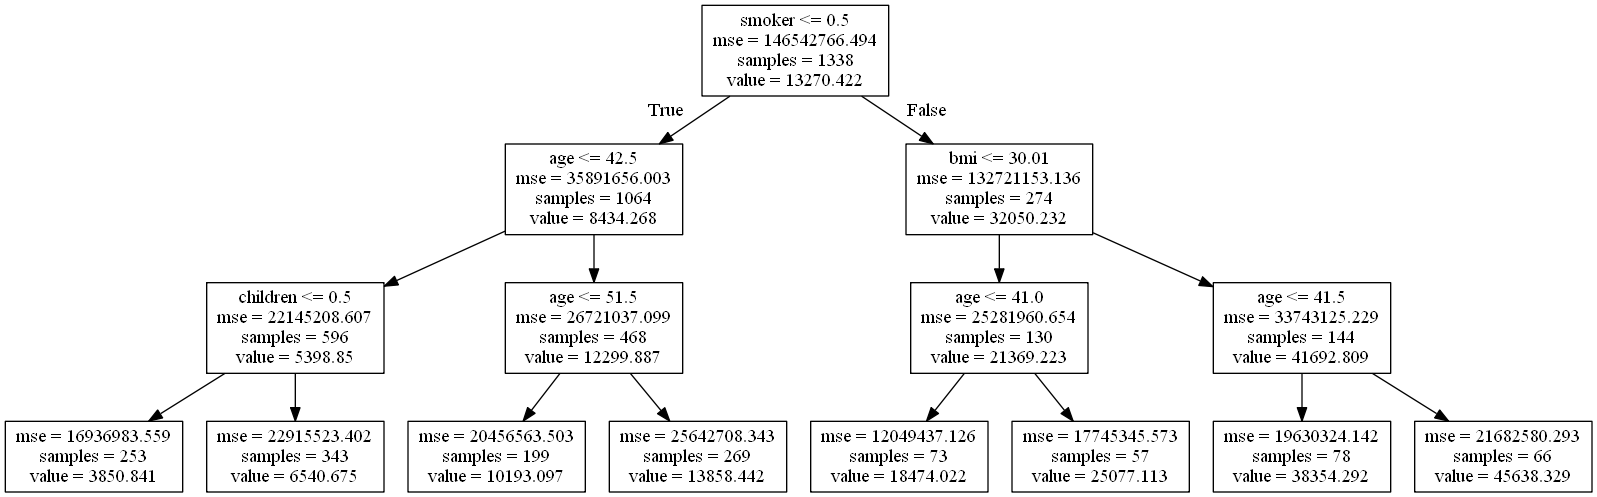

In [101]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=3, min_samples_leaf=10, random_state=99)


dtfeatures = ['age', 'sex', 'bmi', 'children', 'smoker']
tgt = 'charges'

dfdt = dfi01.copy()

# DT가 수치형 변수만 처리하므로
# 카테고리형 변수를 수치형 변수로 코딩 변경
dfdt['sex'] = np.where(dfdt.sex=='male',1,0)
# 남성은 1, 여성은 0 수치형으로 변경
dfdt['smoker'] = np.where(dfdt.smoker=='yes',1,0)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# 트리 이미지 생성
# import os     
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\'


from sklearn import tree
from IPython.display import Image  
import pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

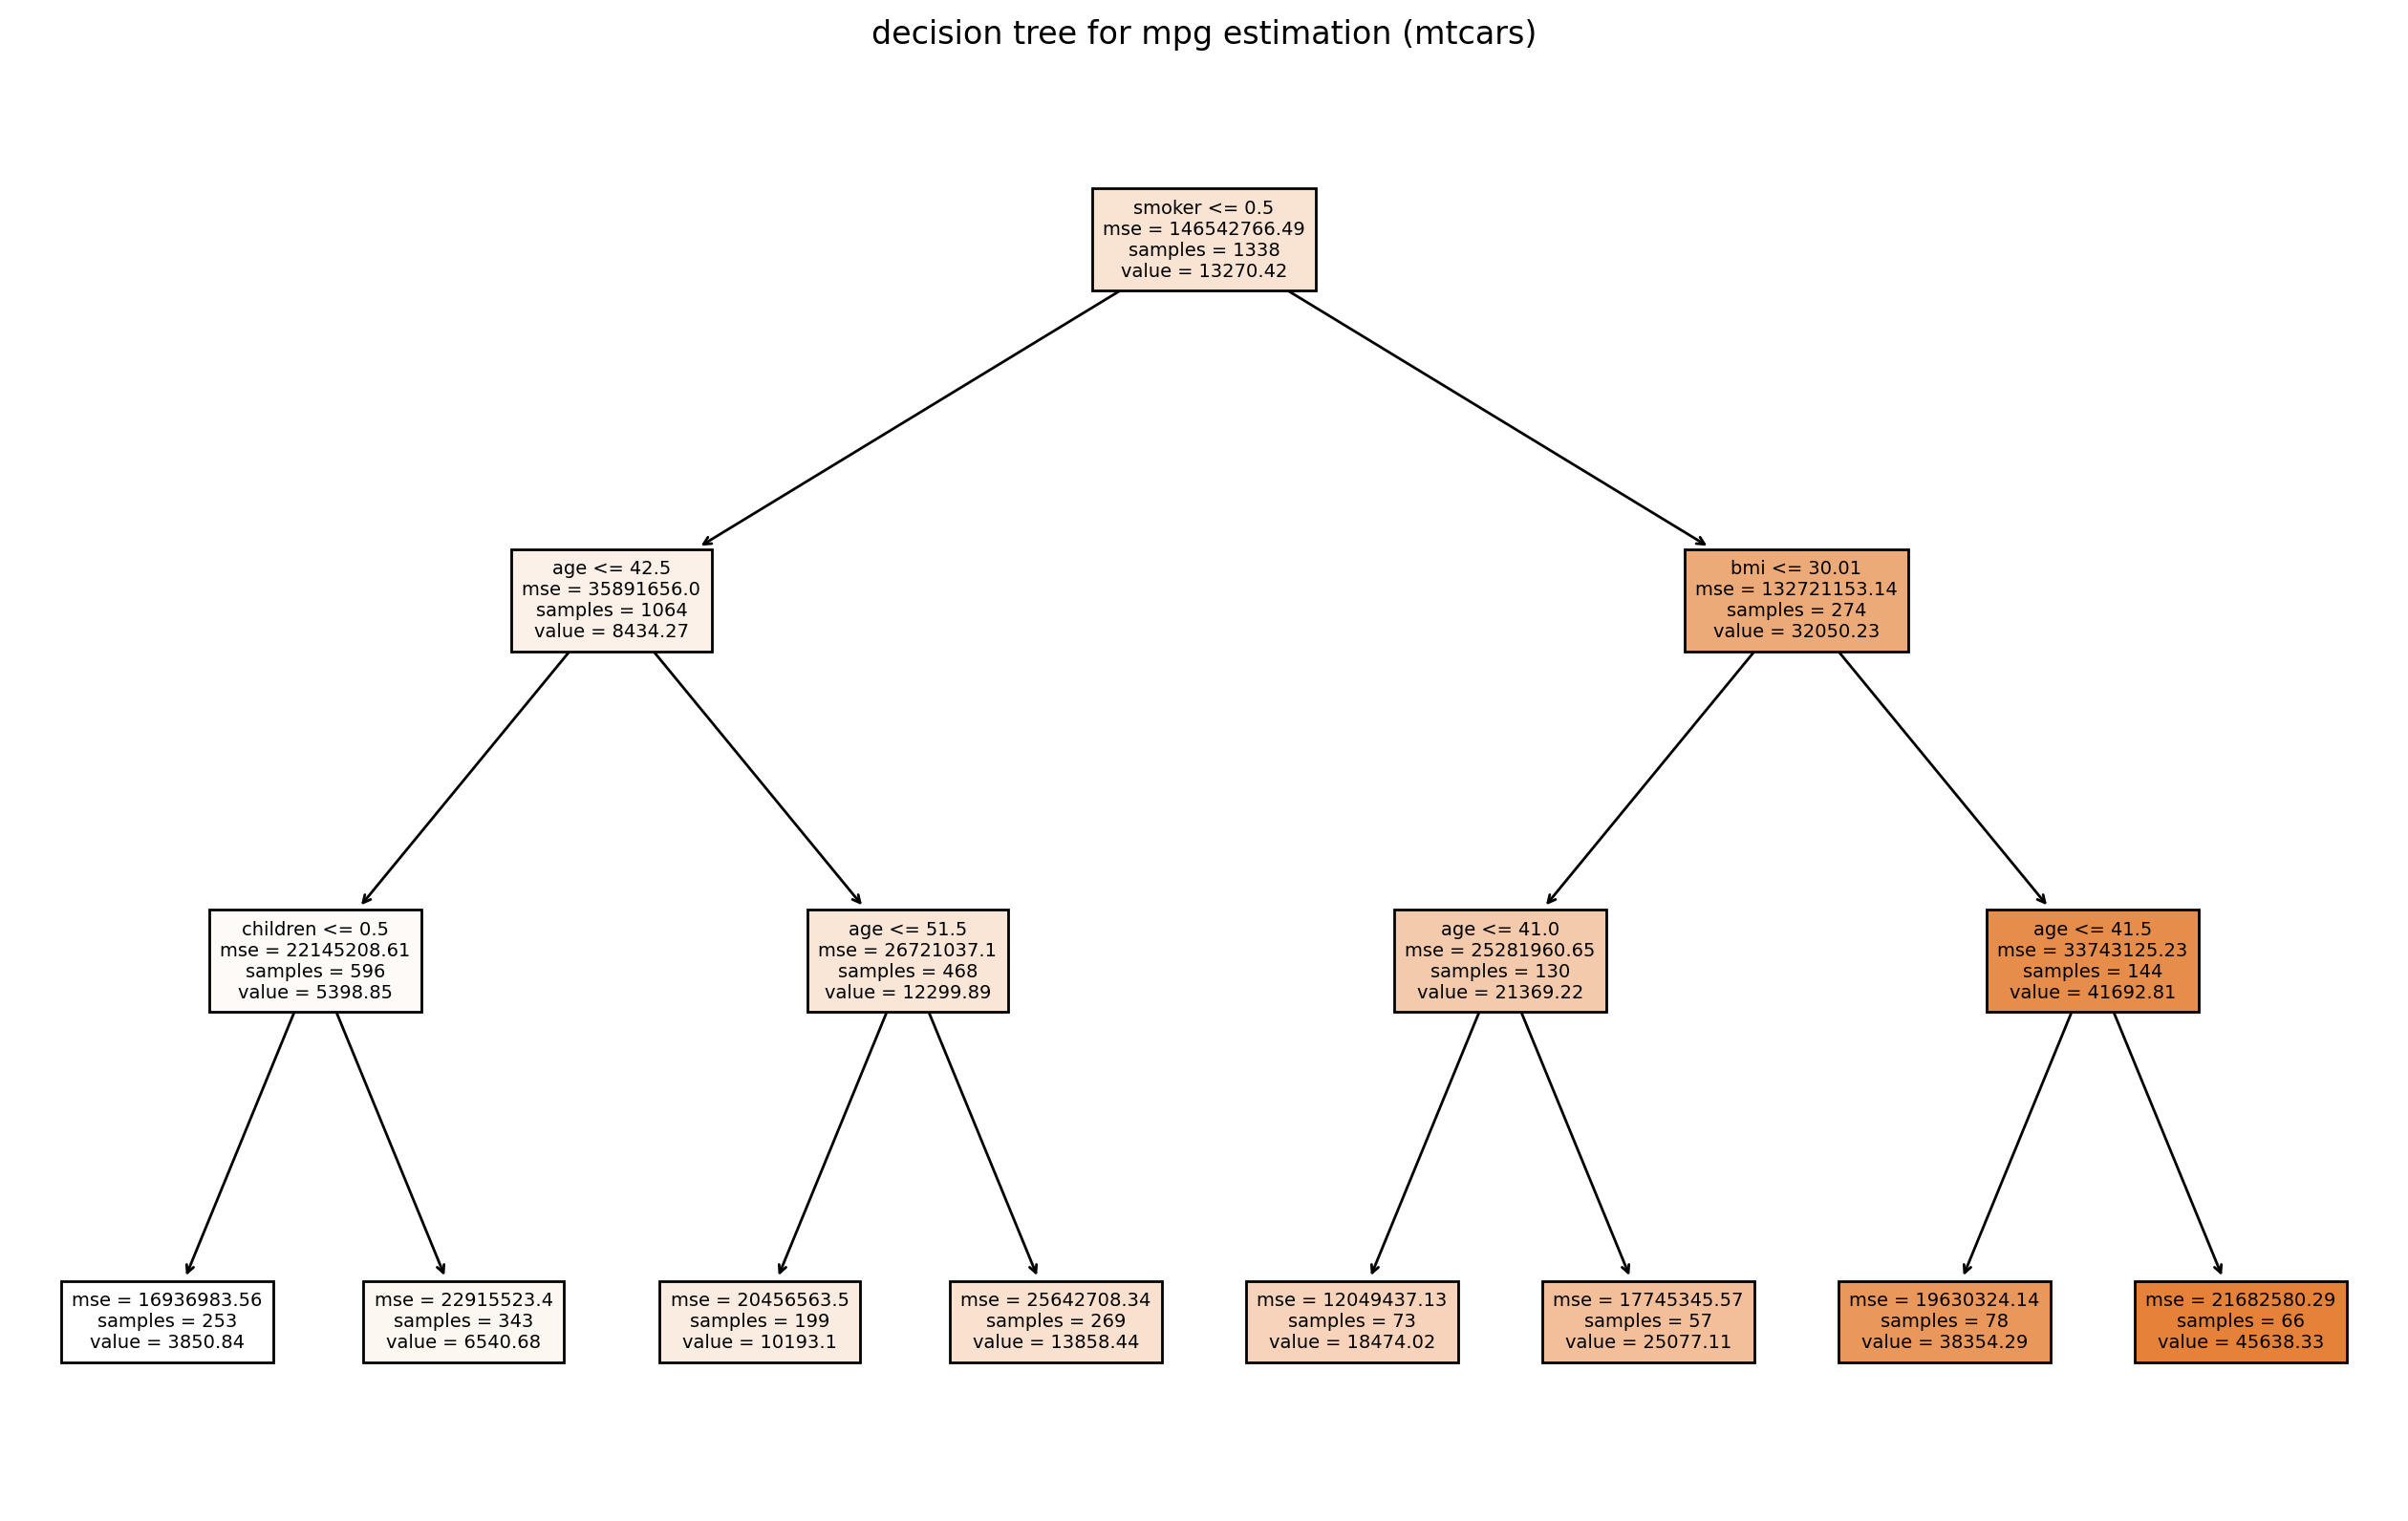

In [106]:
# plotting tree using sklearn 

# varNames = ['A', 'B', 'C', 'D','E']

plt.figure(figsize=(16,10), dpi=200)
tree.plot_tree(dt1, 
               feature_names=dtfeatures, 
               filled=True, 
               fontsize=7, # 폰트사이즈
               precision=2) # 소수점자리수
plt.title('decision tree for mpg estimation (mtcars)');

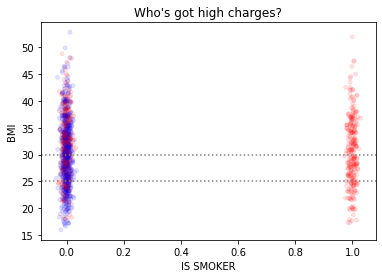

In [107]:
colors1 = ['red' if x > dfdt.charges.median() else 'blue' for x in dfdt.charges]
plt.scatter(rjitt(dfdt.smoker), rjitt(dfdt.bmi), alpha=0.1, s=15,
           color=colors1)
plt.xlabel('IS SMOKER')
plt.ylabel('BMI') # Body Mass Index 
plt.title("Who's got high charges?")
plt.axhline(30, color='grey', linestyle=':')
plt.axhline(25, color='grey', linestyle=':')
plt.show()

- BMI 25.0–29.9 : Over-weight
- BMI 30.0+ : Obese (for adults)
- [BMI 설명 페이지 - 계산기 포함 ] https://www.medicalnewstoday.com/articles/323622.php 


[실습]
- 흡연여부 변수를 제외하고 다시 DT를 생성해보면?

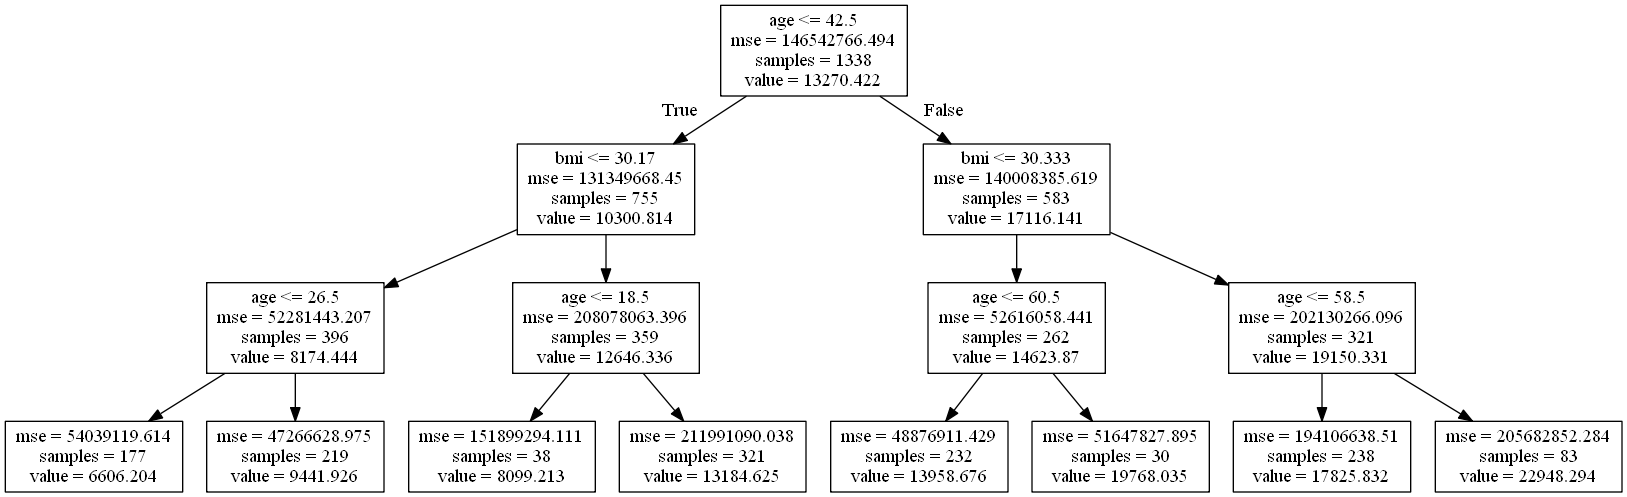

In [108]:
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(min_samples_split=30, max_depth=3, min_samples_leaf=10, random_state=99)


dtfeatures = ['age', 'sex', 'bmi', 'children']
tgt = 'charges'

dfdt = dfi01.copy()

# DT가 수치형 변수만 처리하므로
# 카테고리형 변수를 수치형 변수로 코딩 변경
dfdt['sex'] = np.where(dfdt.sex=='male',1,0)
# 남성은 1, 여성은 0 수치형으로 변경
dfdt['smoker'] = np.where(dfdt.smoker=='yes',1,0)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# 트리 이미지 생성
# import os     
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Anaconda3\\Library\\bin\\'


from sklearn import tree
from IPython.display import Image  
import pydotplus, graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


### Random Forests

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


r-squared : 0.8881737729372254


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


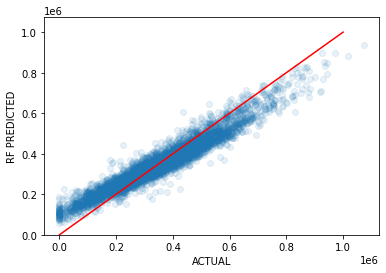

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training MAE:  42913.60624211641


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.3s finished


In [114]:
# 변수 정의
dtfeatures = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']
tgt = 'amt_nxtyr'
dfdt = dfc21

# 회귀분석(target 변수가 수치형)에서는 regressor
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=300, 
                                  criterion='mse', 
                                  random_state=99,
                                  oob_score=True, 
                                  verbose=1) # 중간결과 생략
regressor.fit(dfdt[dtfeatures], dfdt[tgt])
print('r-squared :', regressor.score(dfdt[dtfeatures], dfdt[tgt], sample_weight=None))

y_pred = regressor.predict(dfdt[dtfeatures])

plt.scatter(dfdt[tgt],y_pred, alpha=0.1)
plt.ylim(0,dfdt[tgt].max())
plt.xlabel('ACTUAL')
plt.ylabel('RF PREDICTED')
# 대각선을 표시 (perfect prediction)
plt.plot([0,1000000], [0,1000000], color='red')
plt.show()

# Compute MAE (Mean Absolute Error: 오차의 절대값 평균)
y_rf_pred = regressor.predict(dfdt[dtfeatures])
print('Training MAE: ', np.mean(np.abs(dfdt[tgt] - y_rf_pred)))

- 이상적인 fitting line (red)와 영역별 얼마간 차이 발생
- Actual이 큰 구간에서 약간 작은 값을 predict
- n_estimators(트리의 수)를 100, 2000으로 변경해서 오차를 확인해보면?

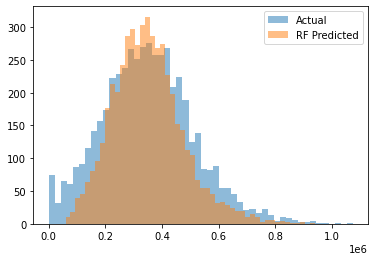

In [115]:
# Predicted 값의 분포 비교

plt.hist(dfdt[tgt], bins=50, alpha=0.5)
plt.hist(y_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'RF Predicted'])
plt.show()

### CatBoost

In [126]:
from catboost import CatBoostRegressor

print(dfdt.columns)

cbmodel = CatBoostRegressor(iterations=3000, learning_rate=1,
                            eval_metric='R2', # [ RMSE , R2 ]
                            loss_function='RMSE',
                            use_best_model=True,
                            random_seed=0,
                            # max_depth=4, 
                            depth=6,
                            bagging_temperature = 0.2,
                            metric_period = 100)

dfdt = dfc21.copy()        
dtfeatures = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']
train_x = dfdt[dtfeatures] 
print(dtfeatures)
tgt = 'amt_nxtyr'
train_y = dfdt[tgt]

cbmodel.fit(
    train_x, train_y,
    # cat_features=categorical_features_indices,
    # verbose=True,  # you can uncomment this for text output
    plot=True, # NOTE: does not work for classifier
    eval_set=(train_x, train_y)    
)



Index(['custid', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login',
       'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1934032	test: 0.1934032	best: 0.1934032 (0)	total: 3.91ms	remaining: 11.7s
100:	learn: 0.5893719	test: 0.5893719	best: 0.5893719 (100)	total: 614ms	remaining: 17.6s
200:	learn: 0.7132997	test: 0.7132997	best: 0.7132997 (200)	total: 1.43s	remaining: 19.9s
300:	learn: 0.7797403	test: 0.7797403	best: 0.7797403 (300)	total: 2.38s	remaining: 21.3s
400:	learn: 0.8313094	test: 0.8313094	best: 0.8313094 (400)	total: 3.24s	remaining: 21s
500:	learn: 0.8662563	test: 0.8662563	best: 0.8662563 (500)	total: 4.02s	remaining: 20.1s
600:	learn: 0.8871155	test: 0.8871155	best: 0.8871155 (600)	total: 4.81s	remaining: 19.2s
700:	learn: 0.9063936	test: 0.9063936	best: 0.9063936 (700)	total: 5.72s	remaining: 18.8s
800:	learn: 0.9195786	test: 0.9195786	best: 0.9195786 (800)	total: 6.59s	remaining: 18.1s
900:	learn: 0.9307383	test: 0.9307383	best: 0.9307383 (900)	total: 7.41s	remaining: 17.3s
1000:	learn: 0.9391645	test: 0.9391645	best: 0.9391645 (1000)	total: 8.13s	remaining: 16.2s
1100:	learn: 

<Figure size 432x288 with 0 Axes>

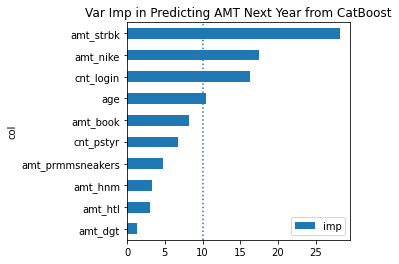

,imp,col,cum_sum_imp
3,28.18,amt_strbk,28.18
1,17.53,amt_nike,45.71
9,16.35,cnt_login,62.06
0,10.50,age,72.56
5,8.27,amt_book,80.83
8,6.71,cnt_pstyr,87.54
7,4.82,amt_prmmsneakers,92.36
2,3.35,amt_hnm,95.71
6,3.03,amt_htl,98.74
4,1.27,amt_dgt,100.01


In [160]:
# Mapping Feature Importance 변수중요도 출력

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': train_x.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
mean_vimp = fea_imp.imp.mean()
plt.axvline(mean_vimp, linestyle=':')
plt.show()


fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

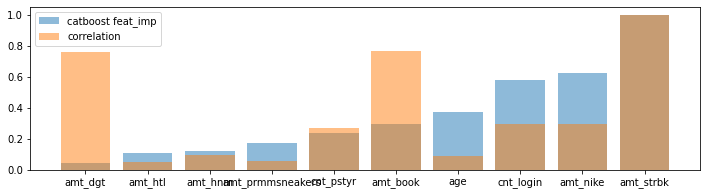

In [27]:
# Variable Importance와 Correlation을 비교해보면?

corrs = np.repeat(0.0, 10) # conviently set data type
vars = list(fea_imp.col)
for i in range(len(vars)):
    corrs[i] = np.corrcoef(dfc21.amt_nxtyr, dfc21[vars[i]])[0,1]

plt.figure(figsize=(12,3))
plt.bar(fea_imp.col, zrmx_scl(fea_imp.imp), alpha=0.5)
# Correlation의 부호는 강도가 아니므로 절대값 사용
plt.bar(fea_imp.col, zrmx_scl(abs(corrs)), alpha=0.5)
plt.legend(['catboost feat_imp', 'correlation'])
plt.show()

- Correlation과 CatBoost Feature Importance가 다른 이유는? 
- Correlation 값이 큰 amt_book, amt_dgt가 importance 낮은 이유는?

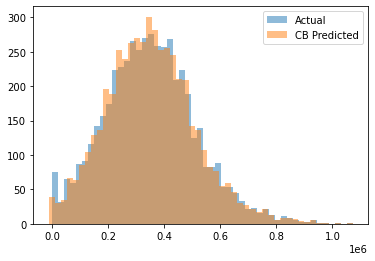

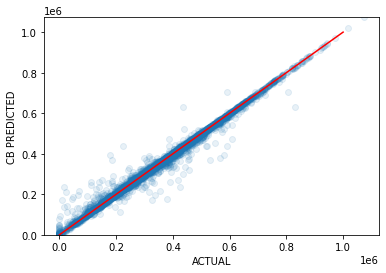

Training MAE:  7290.0780621733975


0.9939154900916628

In [162]:
y_cb_pred = cbmodel.predict(train_x)

plt.hist(train_y, bins=50, alpha=0.5)
plt.hist(y_cb_pred, bins=50, alpha=0.5)
plt.legend(['Actual', 'CB Predicted'])
plt.show()

plt.scatter(train_y, y_cb_pred, alpha=0.1)
plt.ylim(0,train_y.max())
plt.xlabel('ACTUAL')
plt.ylabel('CB PREDICTED')
plt.plot([0,1000000], [0,1000000], color='red')
plt.show()

# Compute MAE
y_cb_pred = cbmodel.predict(train_x)
print('Training MAE: ', np.mean(np.abs(train_y - y_cb_pred)))
np.corrcoef(train_y, y_cb_pred)[0,1]

#### 10 fold cross validation of Catboost

In [163]:
from catboost import Pool, cv

# cat_features = [0]

cv_dataset = Pool(data=train_x,
                  # cat_features=cat_features, 
                  label=train_y)
                  

params = {"iterations": 50,
          "depth": 3,
          "loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=10, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [30]:
# Cross Validation 결과 Sample을 무작위로 바꿔 테스트해봐도 거의 일정한 결과가 나옴을 알 수 있음

## Supervised Predictive Machine Learning for Classfication Problems

In [164]:
list_feat = ['custid', 'area', 'education', 'age','amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book',
             'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login', 'cnt_nxtyr']

# custid : ID
# cnt_nxtyr : Target to predict

dfc22 = dfc20[list_feat]
dfc22.shape

(6000, 14)

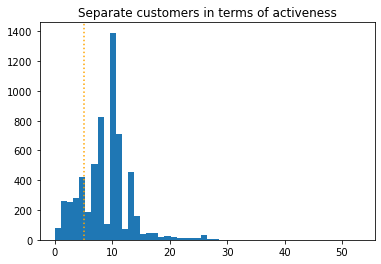

(1037, 13)

In [165]:
# Classification 형식으로 Target 정의

# check target distribution

plt.hist(dfc22.cnt_nxtyr, bins=50)
plt.axvline(5, color='orange', linestyle=':')
plt.title('Separate customers in terms of activeness')
plt.show()

dfc21[dfc21.cnt_nxtyr<=5].shape

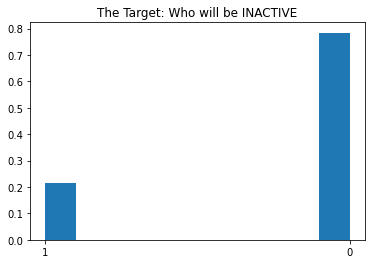

In [166]:
dfc22['is_inactive'] = np.array(np.where(dfc22.cnt_nxtyr<=5, '1', '0'))
# Frequency count 대신 비율을 y 축에 표시
plt.hist(dfc22.is_inactive, weights=np.ones(len(dfc22)) / len(dfc22))
plt.title('The Target: Who will be INACTIVE')
plt.show()

# 참고: 이탈예측 == 이탈?? 이탈 (defection) = {churn , attrition}

# predicting defection in terms of trx count in the next year

rarer class가 15% 미만인 경우라면 imbalanced. 모델이 bias되고 정확도 낮아질 수 있음 

### Logistic Regression Classifier

In [167]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

feats = ['age', 'amt_nike', 'amt_hnm','amt_strbk','amt_dgt','amt_book',
             'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']

tgt = np.where(dfc22['is_inactive']=='1',1, 0) # 수치형식으로 target 정의

logit_model=sm.Logit(tgt,dfc22[feats])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509145
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: y                AIC:              6129.7370 
Date:               2020-12-10 13:55 BIC:              6196.7321 
No. Observations:   6000             Log-Likelihood:   -3054.9   
Df Model:           9                LL-Null:          -3128.2   
Df Residuals:       5990             LLR p-value:      4.2851e-27
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age               -0.0221   0.0030 -7.3923 0.0000 -0.0280 -0.0162
amt_nike          -0.0000   0.0000 -3.8982 0.0001 -0.0000 -0.0000


[참고] 회귀모델의 성능지표
- AIC와 BIC : AIC는 Akaike Information Criterion 의 약자며, BIC는 Bayesian Information Criterion
- 둘 다 작은 값을 가지는 회귀식이 더 적합한 회귀식

In [168]:
# eliminate variabes with the p-value largerthan 0.05 in the previous run
feats = ['age', 'amt_nike', 'amt_strbk','amt_dgt','amt_book', 'cnt_pstyr']

logit_model=sm.Logit(tgt,dfc22[feats])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.509457
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.023     
Dependent Variable: y                AIC:              6125.4803 
Date:               2020-12-10 13:57 BIC:              6165.6774 
No. Observations:   6000             Log-Likelihood:   -3056.7   
Df Model:           5                LL-Null:          -3128.2   
Df Residuals:       5994             LLR p-value:      4.2405e-29
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
age           -0.0211    0.0025  -8.3890  0.0000  -0.0260  -0.0161
amt_nike      -0.0000    0.0000  -3.8809  0.0001  -0.0000  -0.

[0 0 0 0]
[[0.80134736 0.19865264]
 [0.80255343 0.19744657]
 [0.74478826 0.25521174]
 [0.67123707 0.32876293]]
[0.19865264 0.19744657 0.25521174 ... 0.2742567  0.27193577 0.20119   ]


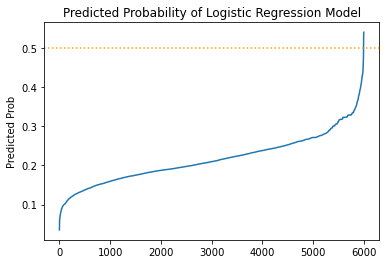

In [190]:
# Logistic Regression Model Fitting

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(dfc22[feats], tgt)


y_pred = logreg.predict(dfc22[feats])
# predict probability
y_predprob=logreg.predict_proba(dfc22[feats])

# print predicted
print(y_pred[:4])
# print predicted
print(y_predprob[:4])
# print predicted prob of '1'
print(y_predprob[:,1])

plt.plot(np.sort(y_predprob[:,1]))
plt.axhline(0.5, color='orange', linestyle=':')
plt.ylabel('Predicted Prob')
plt.title('Predicted Probability of Logistic Regression Model')
plt.show()

In [37]:
# 0.5 이상의 확률로 비활성화가 예상되는 고객의 비율은?
# 실제값에서의 비율과 차이는?

pred_inactive = y_predprob[:,1]
print('% Predicted to be inactive : ', len(pred_inactive[pred_inactive>=0.5])/ len(pred_inactive) *100)

# 정확도 확인 accurate classification rate
print('Accuracy of logistic regression classifier on train set: {:.3f}'.format(logreg.score(dfc22[feats], tgt)))

% Predicted to be inactive :  0.1
Accuracy of logistic regression classifier on train set: 0.784


In [191]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

accuracy = (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()*100
print('\naccuracy % : {:.3f}'.format(accuracy))

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(tgt, y_pred) * 100
print('\naccuracy % : {:.3f}'.format(accuracy))

Confusion Matrix:
 [[4703    3]
 [1291    3]]

accuracy % : 78.433

accuracy % : 78.433


예측 정확도가 80% 가까이가 된 이유는? 
- Majority Class(Not Inactive) 쪽으로 많이 예측한 결과

### Decision Tree Classifier

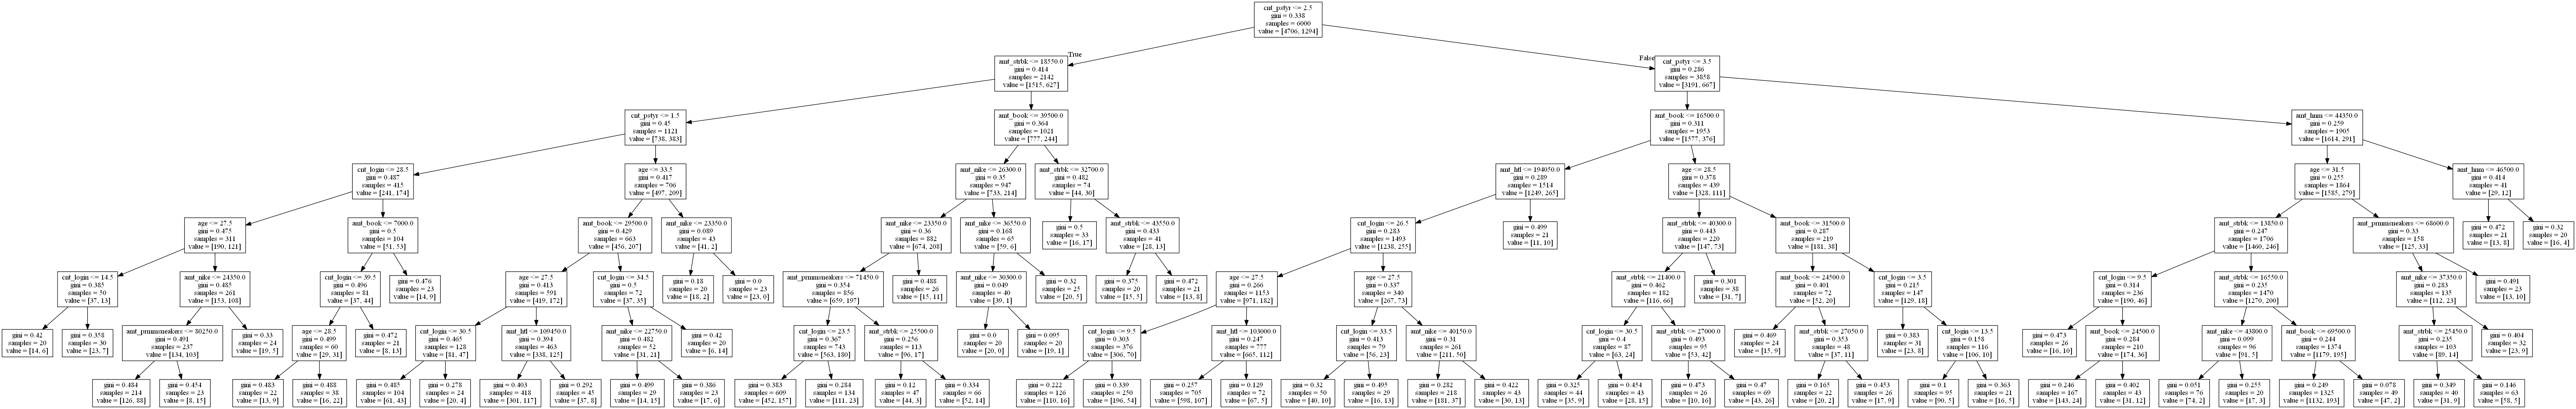

In [209]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, max_depth=7, min_samples_leaf=20, random_state=99)

dtfeatures = ['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']
tgt = tgt
dfdt = dfc22

# Check if there is any missing value
# print('Count of nulls : \n', dfdt.isnull().sum())

dt1.fit(dfdt[dtfeatures], tgt)

# path should have set
# or [ InvocationException: GraphViz's executables not found ] occur 



from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [210]:
# inference and evaluate 

y_pred=dt1.predict(dfdt[dtfeatures])

# confusion matrix

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print('Confusion Matrix : \n', cnf_matrix)

accuracy = 100*(cnf_matrix[0][0] + cnf_matrix[1][1])/ cnf_matrix.sum()
print('\naccuracy % : {:.3f}'.format(accuracy))


Confusion Matrix : 
 [[4628   78]
 [1182  112]]

accuracy % : 79.000


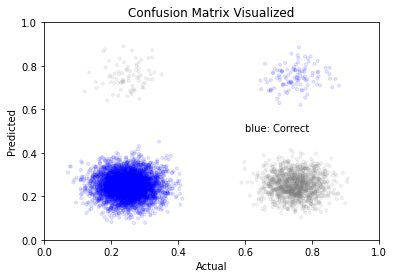

In [211]:
# Visualizing Confusion Matrix (loop와 list 처리 활용 연습용)

l = list([])
colors1 = list([])
n_elems = cnf_matrix.flatten() # Confusion Matrix 각 Cell의 값
positions = [[0,0],[0,1],[1,0],[1,1]] # Cell의 좌표
colorcodes = ['blue','grey','grey','blue']

for i in range(4):
    for j in range(n_elems[i]):
        l.append(positions[i])
        colors1.append(colorcodes[i])

# 다른 방식으로 한다면        
# colors1 = np.concatenate((np.repeat('blue',4653), np.repeat('grey',53), np.repeat('grey',1233), np.repeat('blue',61)))        
   
# 4분면 각각의 중앙을 중심으로 분산 배치하기 위해 좌표 조정
arr = (np.array(l)/2)+0.25

# 무작위 분산을 위한 함수. 분산 폭을 넓게
def rjitt2(arr):
    stdev = .1*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


plt.scatter(rjitt2(arr[:,0]), rjitt2(arr[:,1]), 
            alpha=0.1, s=10, color=colors1)    
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix Visualized')
plt.text(0.6,0.5, 'blue: Correct')
plt.show()

# 단순히 confusion matrix의 숫자들만 시각화하는 용도.
# 좌표는 무의미하고 4분면 cell 구분만 의미

# Use RF Classifier

In [186]:
# select numeric features only

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numcols = dfc22.select_dtypes(include=numerics).columns
rffeatures = numcols.drop(['custid', 'cnt_nxtyr']) # target 용 변수와 ID는 제외
print(rffeatures)

train_x = dfc22[rffeatures]
train_y = tgt

# customerid and targets are to be eliminated from the predictor list


from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=500, random_state=0, verbose=2)
rfmodel.fit(train_x, train_y)
y_pred = rfmodel.predict(train_x)
'sample prediction results:', y_pred[:10]

Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login'],
      dtype='object')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished


('sample prediction results:', array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1]))

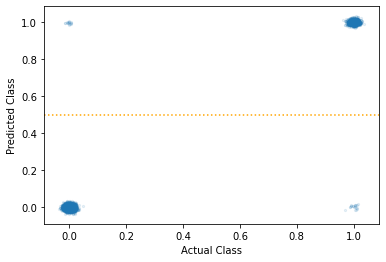

Confusion Matrix : 
 [[4689   17]
 [  21 1273]]

accuracy % : 99.367


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


[[0.378  0.622 ]
 [0.964  0.036 ]
 [0.2548 0.7452]
 [0.9326 0.0674]]


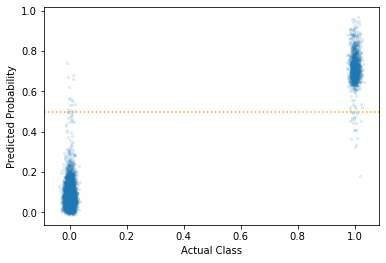

In [187]:
plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(np.array(y_pred).astype(int)), alpha=0.1, s=5)
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.axhline(0.5, color='orange', linestyle=':')
plt.show()


# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(tgt, y_pred)
print('Confusion Matrix : \n', cnf_matrix)

accuracy = 100*(cnf_matrix[0][0] + cnf_matrix[1][1])/ cnf_matrix.sum()
print('\naccuracy % : {:.3f}'.format(accuracy))


# predict probability
y_predp = rfmodel.predict_proba(train_x)
print(y_predp[:4])

plt.scatter(rjitt(np.array(train_y).astype(int)), rjitt(y_predp[:,1]), alpha=0.1, s=5)
plt.axhline(0.5, color='orange', linestyle=':')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Probability')
plt.show()


- [Discussion] Train set에 대한 self-test에서 99% 정확도를 얻었다고 새로운 사례에 대해서도 동일한 수준의 정확도를 보일 수 있을까?

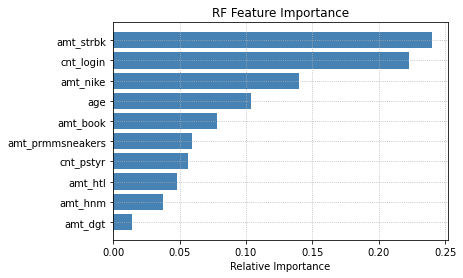

In [188]:
# Feature Importance Chart 생성

importances = rfmodel.feature_importances_
# np.argsort: 중요도 순으로 정렬할 경우에서의 index 리스트를 return
indices = np.argsort(importances)

plt.title('RF Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='steelblue')
plt.yticks(range(len(indices)), [rffeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(linestyle=':')
plt.show()

In [189]:
# importance 값과 변수명이 중요도 크기 순으로 정렬되어있지 않은 상태
print(rfmodel.feature_importances_)
print(rffeatures)

[0.10352566 0.14010889 0.03749498 0.23985725 0.01399104 0.07823687
 0.04784775 0.05963416 0.05670565 0.22259775]
Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login'],
      dtype='object')


변수중요도 (Variable Importance or Feature Importance)의 활용
- 변수의 의미에 대한 이해
- 중요도 높은 일부 변수만으로 변수선택

### Checking Permutation Importance of Features
- The permutation feature importance is defined to be the decrease in a model score <font color='red'>when a single feature value is randomly shuffled</font>.

['age', 'amt_nike', 'amt_strbk', 'amt_dgt', 'amt_book', 'cnt_pstyr']


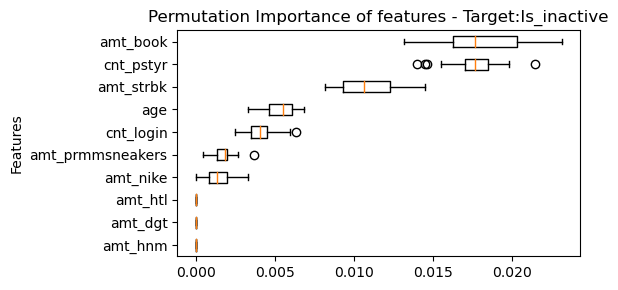

In [193]:
# Checking Permutation Importance of Features

from sklearn.inspection import permutation_importance

result = permutation_importance(dt1, dfc22[rffeatures], tgt, n_repeats=30, random_state=0, n_jobs=-1)
print(feats)
fig, ax = plt.subplots(dpi=100, figsize=(6,3))
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, 
           labels=np.array(rffeatures)[sorted_idx])
ax.set_title("Permutation Importance of features - Target:Is_inactive")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


['age', 'amt_nike', 'amt_strbk', 'amt_dgt', 'amt_book', 'cnt_pstyr']


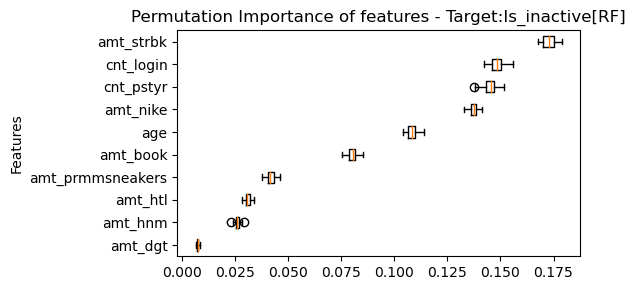

In [194]:
# Checking Permutation Importance of Features - RF

from sklearn.inspection import permutation_importance

result = permutation_importance(rfmodel, dfc22[rffeatures], tgt, n_repeats=30, random_state=0, n_jobs=-1)
print(feats)
fig, ax = plt.subplots(dpi=100, figsize=(6,3))
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, 
           labels=np.array(rffeatures)[sorted_idx])
ax.set_title("Permutation Importance of features - Target:Is_inactive[RF]")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

['age', 'amt_nike', 'amt_strbk', 'amt_dgt', 'amt_book', 'cnt_pstyr']


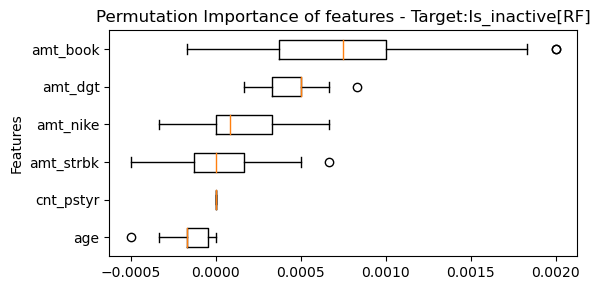

In [198]:
# Checking Permutation Importance of Features - Logistic Regression

from sklearn.inspection import permutation_importance

feats = ['age', 'amt_nike', 'amt_strbk','amt_dgt','amt_book', 'cnt_pstyr']

result = permutation_importance(logreg, dfc22[feats], tgt, n_repeats=30, random_state=0, n_jobs=-1)
print(feats)
fig, ax = plt.subplots(dpi=100, figsize=(6,3))
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, 
           labels=np.array(feats)[sorted_idx])
ax.set_title("Permutation Importance of features - Target:Is_inactive[RF]")
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

[Discussion] 자체적으로 feature importance를 제공하는 경우에도 permutation importance가 유용할까?

### Checking Out Classifier Accuracy, ROC, AUC
- 트레이닝셋 결과와 테스트셋 결과 차이 비교 필요~~~^^

['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl', 'amt_prmmsneakers', 'cnt_pstyr', 'cnt_login']
AUC: 0.61


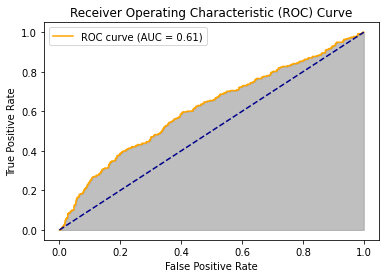

Row: Actual
 [[914   8]
 [276   2]] 

PCNT accuracy = 76.33 


In [199]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the fpr and tpr for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

trainX, testX, trainy, testy = train_test_split(dfc22[rffeatures], tgt, test_size=0.2, random_state=33)

# model = DecisionTreeClassifier(min_samples_split=40, max_depth=4, min_samples_leaf=10, random_state=99)
# model = LogisticRegression()
model = RandomForestClassifier(n_estimators=500, random_state=0, min_samples_leaf=5)
# model = CatBoostClassifier(iterations=500, eval_metric='Accuracy', loss_function='CrossEntropy', depth=3, random_seed=42, verbose=False)
model.fit(trainX, trainy)

print(dtfeatures)


probs = model.predict_proba(testX)
preds = probs[:,1]

auc = roc_auc_score(testy, preds)
print('AUC: %.2f' % auc)


def plot_roc_curve(fpr, tpr):
    # 선의 의미와 참고정보를 label 란에 표시
    plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    # 커브 아래 영역에 색칠
    plt.fill_between(fpr, tpr, color='grey', alpha=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, model.predict(testX).astype(int))
print('Row: Actual\n',cnf_matrix, '\n')


accuracy = accuracy_score(testy, model.predict(testX).astype(int)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


### CatBoost Classifier including Categorical Features (= mixed type)

- In CatBoost, min_data_in_leaf is a parameter for training not symmetric trees. 
- But in most cases default growing strategy works best, so you can try to use it.

Index(['Unnamed: 0', 'custid', 'age', 'sex', 'marital', 'area', 'education',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
       'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')
(6000, 16) 6000
age                  int64
area                object
education           object
marital             object
amt_nike             int64
amt_hnm              int64
amt_strbk            int64
amt_dgt              int64
amt_book             int64
amt_htl              int64
amt_prmmsneakers     int64
cnt_pstyr            int64
cnt_login            int64
dtype: object
[1 2 3]
Learning rate set to 0.010661
0:	learn: 0.7883333	total: 39.2ms	remaining: 1m 18s
50:	learn: 0.7883333	total: 1.81s	remaining: 1m 9s
100:	learn: 0.7883333	total: 3.36s	remaining: 1m 3s
150:	learn: 0.7883333	total: 4.73s	remaining: 57.9s
200:	learn: 0.7883333	total: 6.37s	remaining: 57.1s
250:	learn: 0.788333

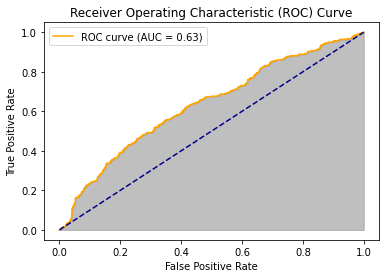


Confusion Matrix :
 [[912  10]
 [274   4]]
PCNT accuracy = 76.33 


In [200]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
# calculate the FPR and TPR for all thresholds of the classification
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

print(dfc20.columns)
list_featc = ['custid','age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login',
             'amt_nxtyr', 'cnt_nxtyr']
# print(dfc20.columns)
dfc23 = dfc20[list_featc]
print(dfc23.shape, len(tgt))

dfdt = dfc23.copy()
tgt = tgt

# use all available features including categorical ones
dtfeatures = ['age','area', 'education', 'marital', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login']

# 범주형의 변수가 어느 것들인지 index list를 지정
# 변수들 각각별 데이터타입을 뽑아서 그 중 Object 타입인 것만 선별
# Object 타입인 변수들의 index 들을 리스트로 출력 --> CatBoost에 알려줌
categorical_features_indices = np.where(dfdt[dtfeatures].dtypes == np.object)[0]
print(dfdt[dtfeatures].dtypes)
print(categorical_features_indices)

# print(dfdt[dtfeatures].head(), dfdt[dtfeatures].tail())

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=33)

cbmodel = CatBoostClassifier(iterations=2000, 
                             eval_metric='Accuracy', 
                           # loss_function='CrossEntropy', 
                             depth=6, random_seed=42, 
                             metric_period = 50)
cbmodel.fit(trainX, trainy, cat_features=categorical_features_indices)

print(dtfeatures)

probs = cbmodel.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.3f' % auc)

# ROC Chart 출력
fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)


# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(testy, cbmodel.predict(testX).astype(int))
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, cbmodel.predict(testX).astype(int)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


[ROC 커브 Checkpoint] ROC 커브가 매끄럽지 않고 울퉁불퉁하다면 (esp. Unseen Set에서) 모델의 Overfitting 의심 가능

<Figure size 432x288 with 0 Axes>

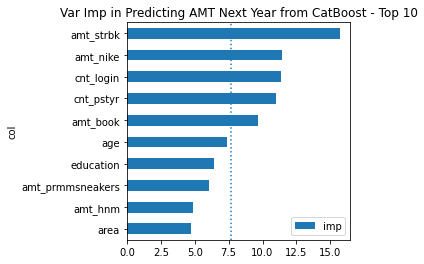

,imp,col,cum_sum_imp
6,15.69,amt_strbk,15.69
4,11.43,amt_nike,27.12
12,11.35,cnt_login,38.47
11,11.00,cnt_pstyr,49.47
8,9.63,amt_book,59.10
0,7.40,age,66.50
2,6.39,education,72.89
10,6.05,amt_prmmsneakers,78.94
5,4.85,amt_hnm,83.79
1,4.72,area,88.51


In [201]:
# Mapping Feature Importance of Mixted Type CatBoost
# Categorical Feature 역시 한 변수 단위로 (변수의 class 단위가 아니라) 중요도 산출

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': dtfeatures})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-10:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost - Top 10')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

[Discussion] 변수중요도가 변수Pool에 변화가 있으면 달라지는 (순위까지) 이유는?

### Predictive Modeling (=Supervised ML) 부분 중간 요점 정리
- regression (숫자형 타겟), classification(범주형 타겟)
- 분류: 범주형: 로지스틱 리그레션 또는 ???Classifier 
- 리그레션: 숫자형: 리그레션 또는 ???Regressor
- RF, CatBoost, (XGBoost) -- DT의 앙상블 모형 - 여러개의 DT를 사용
- DT, RF, XGBoost ... 수치형 변수만 사용 = 범주형 변수는 사용하지 않음
- CatBoost .... 범주형 변수도 처리하는 XGBoost 업그레이드 버전
- 변수중요도 ... RF, CatBoost 변수중요도 자동 산출 (챠트 작성 필요)
- Permutation Importance ... 모델의 종류 무관하게 중요도 산출
- 변수중요도는 절대값이 아닌 상대값 (변수 Pool이 달라지면 값 달라짐)
- 모델의 종류별로 서로 다른 변수를 중요하게 여길 수 있음
- ROC Chart - 범주형 타겟 인 경우 확률의 구분점을 0.5보다 높이거나 낮추는데 따라 정확도 달라지므로
    구분점에 무관한 모델 분류 능력을 측정 (AUC가 0.5보다 클 수록)

### Encoding Categorical Features in ML
- feature engineering 단계에서 매우 중요한 부분인 인코딩은 categorical feature를 수치형으로 변환해서 모델에 투입하기 위해 실시 (다수의 ML algorithm들이 수치형 feature만 을 허용. Algorithm이 기본제공하는 자동적 방식이 있는 경우에도 속도와 신축성에서 장점)
- 여러 가능한 방식이 있으나<br><br>

- Ordinal : 값의 크기를 기준으로 순서를 부여해서 수치화
- One-Hot : 각 카테고리 인지 여부를 dummy variable 형태로 추가
- Binary : 특정 기준에 부합하는지 여부로 이분법으로 구분하는 변수 추가
- Target Encoding : 타겟 변수의 값에 대한 대표값(예: 수치형 타겟이면 평균, 카테고리형 타겟이면 특정카테고리의 비율)을 나타내는 변수를 추가


In [202]:
# prepare a copied subset of dfdt

dfenc = dfc20.copy()

dfenc1 = dfenc[['marital', 'area', 'education']]
dfenc1.head()

# Target Encoding - Area

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()
dfn001 = dfenc1[['area','tgt']].groupby('area').mean().reset_index()
dfn001.columns = ['area', 'tgt_encoded_area']
dfn001.head()

,area,tgt_encoded_area
0,GYNG,0.18900
1,INCN,0.20800
2,SEOL,0.22425


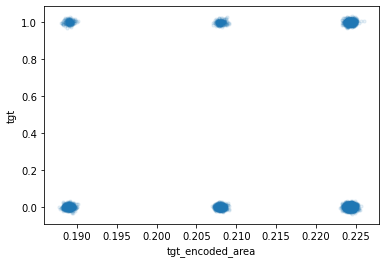

0.032387121981000404


In [203]:
dfenc2 = dfenc.merge(dfn001, on='area', how='left')

plt.scatter(rjitt(dfenc2.tgt_encoded_area), rjitt(tgt.astype(int)),
           alpha=0.1, s=10)
plt.xlabel('tgt_encoded_area')
plt.ylabel('tgt')
plt.show()

print(np.corrcoef(dfenc2.tgt_encoded_area, tgt.astype(int))[0,1])

In [204]:
# Ordinal Encoding - Education

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()

list_education = list(dfenc1.education.unique())
list_education_ord = [2,1,3,4]
dfn002 = pd.DataFrame({'education':list_education,
             'ord_encoded_education': list_education_ord})

dfn002.head()

,education,ord_encoded_education
0,university,2
1,college,1
2,master,3
3,phd,4


In [205]:
dfenc3 = dfenc2.merge(dfn002, on='education', how='left')

In [206]:
# Binary Encoding - Education

# Encoding Rule = [ 1 if advanced degree else 0 ]
# 의미: 학부를 초과하는 Advanced Degree 여부로 구분

dfenc1['tgt'] = tgt.astype(int)
dfenc1.head()

list_education = list(dfenc1.education.unique())
list_education_bnr = [0,0,1,1] 
dfn003 = pd.DataFrame({'education':list_education,
             'bnr_encoded_education': list_education_bnr})

dfn003.head()

,education,bnr_encoded_education
0,university,0
1,college,0
2,master,1
3,phd,1


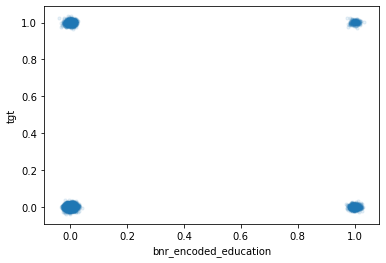

-0.02277450710743197


In [207]:
dfenc4 = dfenc3.merge(dfn003, on='education', how='left')

plt.scatter(rjitt(dfenc4.bnr_encoded_education), rjitt(tgt.astype(int)),
           alpha=0.1, s=10)
plt.xlabel('bnr_encoded_education')
plt.ylabel('tgt')
plt.show()

print(np.corrcoef(dfenc4.bnr_encoded_education, tgt.astype(int))[0,1])

age                        int64
amt_nike                   int64
amt_hnm                    int64
amt_strbk                  int64
amt_dgt                    int64
amt_book                   int64
amt_htl                    int64
amt_prmmsneakers           int64
cnt_pstyr                  int64
cnt_login                  int64
tgt_encoded_area         float64
ord_encoded_education      int64
bnr_encoded_education      int64
dtype: object
[]
0:	learn: 0.7903646	test: 0.7812500	best: 0.7812500 (0)	total: 39.6ms	remaining: 7.88s
5:	learn: 0.7890625	test: 0.7833333	best: 0.7833333 (5)	total: 184ms	remaining: 5.93s
10:	learn: 0.7880208	test: 0.7833333	best: 0.7833333 (5)	total: 350ms	remaining: 6.02s
15:	learn: 0.7877604	test: 0.7833333	best: 0.7833333 (5)	total: 564ms	remaining: 6.48s
20:	learn: 0.7877604	test: 0.7833333	best: 0.7833333 (5)	total: 740ms	remaining: 6.31s
25:	learn: 0.7880208	test: 0.7833333	best: 0.7833333 (5)	total: 949ms	remaining: 6.35s
30:	learn: 0.7880208	test: 0.7833

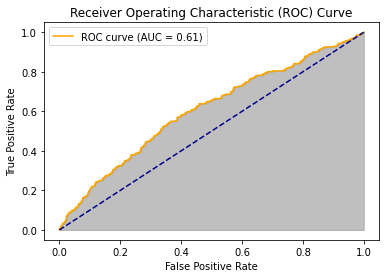


Confusion Matrix :
 [[929   0]
 [270   1]]
PCNT accuracy = 77.50 


In [208]:
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier


dfdt = dfenc4.copy()
tgt = tgt

# 'area', 'education', 
dtfeatures = ['age', 'amt_nike', 'amt_hnm',
             'amt_strbk','amt_dgt','amt_book','amt_htl', 'amt_prmmsneakers', 
             'cnt_pstyr', 'cnt_login', 
              'tgt_encoded_area', 'ord_encoded_education', 'bnr_encoded_education']

categorical_features_indices = np.where(dfdt[dtfeatures].dtypes ==np.object)[0]
print(dfdt[dtfeatures].dtypes)
print(categorical_features_indices)

# print(dfdt[dtfeatures].head(), dfdt[dtfeatures].tail())

# Partitioning - Train, Validation, Test
trainX, testX, trainy, testy = train_test_split(dfdt[dtfeatures], tgt, test_size=0.2, random_state=11)
trainX, valX, trainy, valy = train_test_split(trainX, trainy, test_size=0.2, random_state=11)

cbmodel = CatBoostClassifier(iterations=200, eval_metric='Accuracy', 
                             random_seed=8, 
                             use_best_model=True,
                             loss_function='MultiClass', # ['Logloss', 'MultiClass']
                             depth=9, 
                             l2_leaf_reg = 0.5, # l2_leaf_reg - default 3.0 보다 줄이면 좀 더 정밀한 탐색
                             metric_period = 5)
            
cbmodel.fit(trainX, trainy, 
            # cat_features=categorical_features_indices, 
            # encoding 했으므로 categorical feature들은 사용하지 않음
           eval_set=(valX, valy)) # training 중 모니터링(=튜닝에 반영)할 validation set 지정

print(dtfeatures)

probs = cbmodel.predict_proba(testX)
preds = probs[:,1]

# preds = probs

auc = roc_auc_score(testy, preds)
fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics

# 최종 평가는 학습 중 튜닝에도 반영하지 않았던 test set을 사용
cnf_matrix = metrics.confusion_matrix(testy, cbmodel.predict(testX).astype(int))
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, cbmodel.predict(testX).astype(int)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)


**Partitioning (데이터셋 분할)** 관련 용어 정리
- Train Set: 모델의 학습에 직접 투입된 data set
- Validation Set: 모델 옵션(parameter, hyperparameter 조정 등) 학습을 반복하는 중에 참고하는 data set. 학습에 직접 투입되지 않으나 모의고사 성격으로 미리 활용
- Test Set: 최종 성능 평가를 위한 data set. 최종 모델 결정 이전에는 보여지지 않음(unseen)<br><br>단, Validation, Test 간에는 용어를 interchangeably 사용하는 경우가 흔함

- 대칭형 트리를 구성하는 방식을 사용하기에 catboost가 inference(scoring)에서는 빠를 수 있으나 학습에서는 오히려 더 오래 걸릴 수 있음

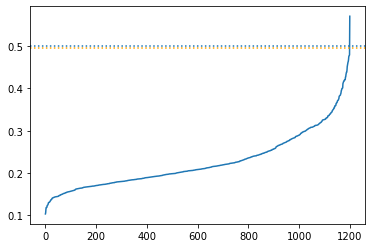

[0.570594   0.47959655 0.47758274 0.4770986  0.47469835 0.46773886
 0.46367639 0.46206439 0.46034486 0.45560507]

Confusion Matrix :
 [[929   0]
 [270   1]]
PCNT accuracy = 77.50 


In [58]:
# Confusion Matrix에서 1로 예측된 경우가 적은 이유는 Tree 기반의 모델이기 때문

# 1로 예측한 경우를 늘리는 것이 필수적이라면,
# leaf의 samplesize를 줄여 조절하거나 Score의 분포를 변경시키는 방식등 활용 가능
# 분포 변경 대신 cutoff threhold (default=0.5)를 조절하는 것도 방법

# cutoff threshold 조절 예
adj_key = .99
plt.plot(np.sort(preds))
plt.axhline(0.5, linestyle=':')
plt.axhline(0.5 * adj_key, linestyle=':', color='orange')
plt.show()

print(-np.sort(-preds)[:10])


pred_ = cbmodel.predict_proba(testX)[:,1]
pred_ = np.where(pred_ >(0.5* adj_key), 1,0)


cnf_matrix = metrics.confusion_matrix(testy, pred_)
print('\nConfusion Matrix :\n', cnf_matrix)

accuracy = accuracy_score(testy, pred_) * 100
print('PCNT accuracy = %0.2f ' % accuracy)

- 1천명 고객 중 이용이 크게 감소할 고객으로 0.5 기준에서 5명, 조절한 낮은 기준 기준으로 40명이 정확히 포착된다고 한다면, 40명을 포착하는 것이 5명만 (좀 더 정확하게) 포착하는 것 보다 중요할 수 있음 (업무적 판단 필요)
- 단순히 Confusion Matrix에서의 예측정확도만으로 평가할 수 없는 이유
- 기준이상의 고객에게 이용감소를 방지하기 위한 목적으로 선물을 준다고 했을때 대상이 증가하는 만큼 비용도 증가. 그 증가를 감수할 것인가에 대한 판단이 필요한 것
- 결국, 생성된 결과를 바탕으로 어떤 Action을 취할 것인가에 따라 다른 판단 필요

<Figure size 432x288 with 0 Axes>

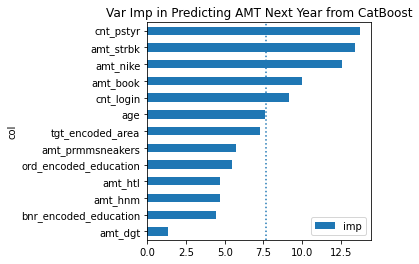

,imp,col,cum_sum_imp
8,13.74,cnt_pstyr,13.74
3,13.40,amt_strbk,27.14
1,12.58,amt_nike,39.72
5,10.02,amt_book,49.74
9,9.14,cnt_login,58.88
0,7.57,age,66.45
10,7.27,tgt_encoded_area,73.72
7,5.72,amt_prmmsneakers,79.44
11,5.44,ord_encoded_education,84.88
6,4.72,amt_htl,89.60


In [59]:
# Mapping Feature Importance of Mixted Type CatBoost

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': dtfeatures})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

### Test Run RF with Encoded Features

Index(['Unnamed: 0', 'age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt',
       'amt_book', 'amt_htl', 'amt_prmmsneakers', 'amt_food', 'amt_beauty',
       'cnt_pstyr', 'amt_pstyr', 'cnt_login', 'tgt_encoded_area',
       'ord_encoded_education', 'bnr_encoded_education'],
      dtype='object')
(6000, 17) (6000,)
[0 0 0 0 0 0 0 0 0 0]
[[955   5]
 [237   3]]
accuracy % :  79.83333333333333


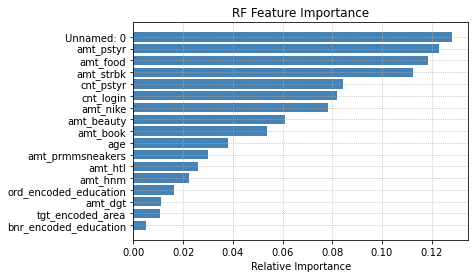

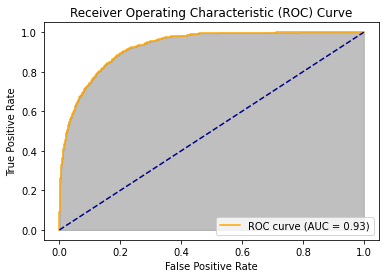

 [ Test Set ROC Chart ] 


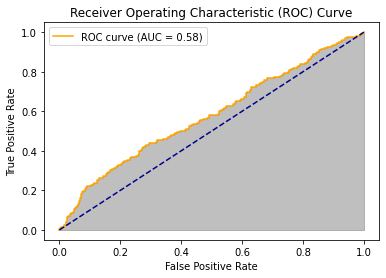

In [60]:
# select numeric features only

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numcols = dfenc4.select_dtypes(include=numerics).columns
dtfeatures = numcols.drop(['custid','amt_nxtyr', 'cnt_nxtyr'])
# optional to exclude encoded categorical features
# dtfeatures = dtfeatures.drop(['ord_encoded_education' , 'bnr_encoded_education' , 'tgt_encoded_area'])
print(dtfeatures)

print(dfenc4[dtfeatures].shape, tgt.shape)

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfenc4[dtfeatures], tgt, test_size=0.2, random_state=13)



from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=2000, random_state=13, verbose=0,
                                max_depth=12, min_samples_split=12, min_samples_leaf=3)
rfmodel.fit(trainX, trainy)
y_pred = rfmodel.predict(testX)
print(y_pred[:10])

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(testy, y_pred)
print(cnf_matrix)

# alternatively
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(testy, y_pred) * 100
print('accuracy % : ', accuracy)


# Feature Implotance Plot

importances = rfmodel.feature_importances_
indices = np.argsort(importances)

plt.title('RF Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='steelblue', align='center')
plt.yticks(range(len(indices)), [dtfeatures[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(linestyle=':')
plt.show()


# ROC and AUC
probs = rfmodel.predict_proba(trainX)
preds = probs[:,1]

auc = roc_auc_score(trainy.astype(int), preds)
fpr, tpr, thresholds = roc_curve(trainy.astype(int), preds) 
plot_roc_curve(fpr, tpr)

# for test set
probs = rfmodel.predict_proba(testX)
preds = probs[:,1]
auc = roc_auc_score(testy, preds)

fpr, tpr, thresholds = roc_curve(testy.astype(int), preds) 
print(' [ Test Set ROC Chart ] ')
plot_roc_curve(fpr, tpr)


- 모델이 완성된 후 운영(Deployment)을 위해서는 모델을 저장했다가 불러서 Scoring (predict, inference) 실행
- CatBoost Model : SAVE model and reload : https://catboost.ai/docs/concepts/python-usages-examples.html


### Predictive (Supervised) 모델링 Process [Review]
- 데이터 준비 - 타겟, input feature (+derived)
- initial test modeling
- 기본탐색 EDA + feature engineering (+encoding)
- 모델링용 dataset Partitioning (train, validation, test)
- 모델링 - 복수 기법, 옵션 적용 (Tuning, Calibration)
- 모델평가 (+ scrore profiling + cross validation)
- Deployment

### Credit Card Default Prediction

[ 추가 dataset]
- Credit Card Default Prediction dataset :: 
- [dataset description ] https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/ 
- This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.
- https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/downloads/default-of-credit-card-clients-dataset.zip/1
 

In [61]:
# reading data
# 다음 달의 신용카드 default 여부 예측

dfcr01 = pd.read_csv(dataPath + 'UCI_credit_card.csv')
print(dfcr01.shape)
dfcr01.head()

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


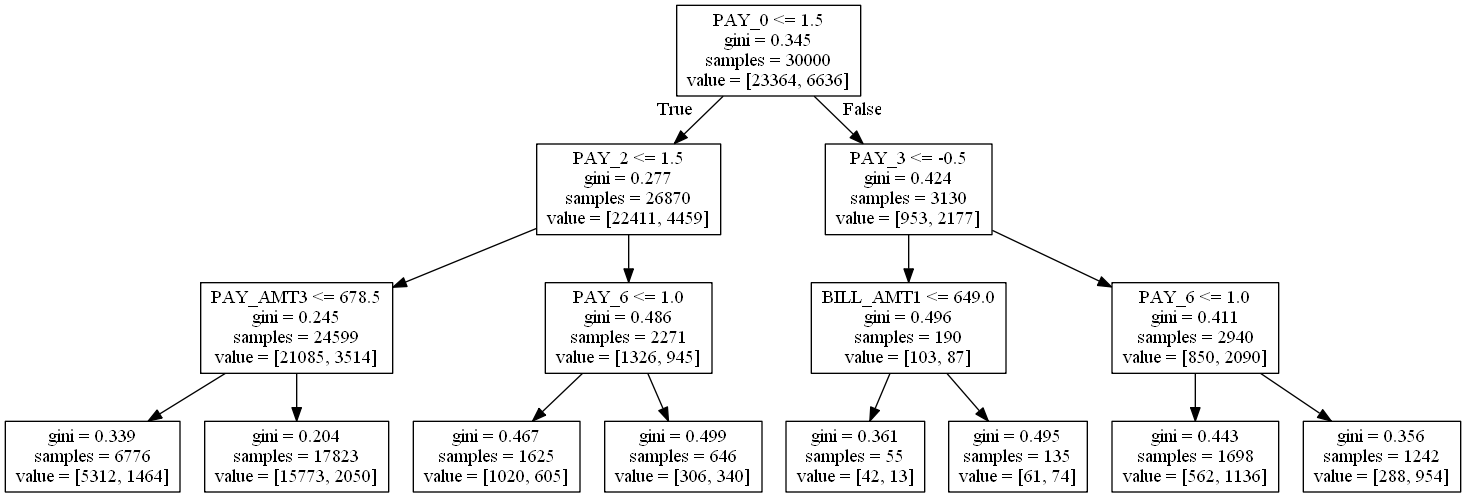

In [62]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(min_samples_split=30, 
                             max_depth=3, 
                             min_samples_leaf=10, 
                             random_state=99)


# dtfeatures = np.array(dfcr01.columns).drop(['ID', 'default.payment.next.month'])
cols = dfcr01.columns
dtfeatures = [x for x in cols if x not in ['ID', 'default.payment.next.month']]
tgt = 'default.payment.next.month'

dfdt = dfcr01.copy()

# 카테고리형 변수를 수치형 변수로 코딩 변경 (인코딩)

dt1.fit(dfdt[dtfeatures], dfdt[tgt])

# graphviz path should have set

from sklearn import tree
from IPython.display import Image  
import pydotplus
import graphviz


# Create DOT data
dot_data = tree.export_graphviz(dt1, out_file=None, 
                                feature_names=dtfeatures)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

추가적인 파생변수 생성
- PAY 합계, BILL 합계
- BILL과 PAY의 비율

다른 모델링 기법 적용 후 성능 비교